In [ ]:
%env HF_TOKEN=YOUR_TOKEN_HERE

/nix/store/flaln6ck4jl5l46z303qbh295dv61rnb-python3-3.10.6-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
51it [00:05,  8.60it/s]


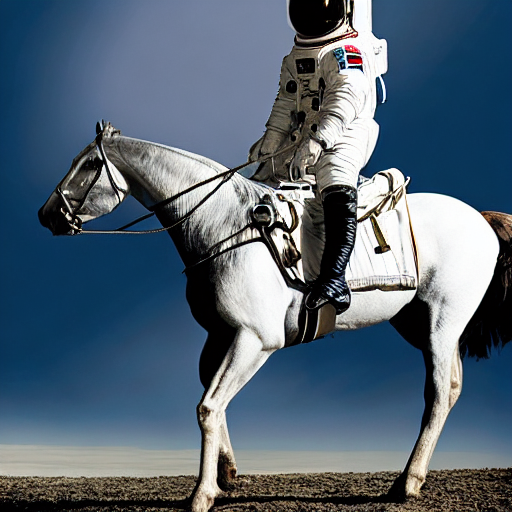

In [2]:
import os
import transformers

from torch import autocast
from diffusers import StableDiffusionPipeline

HF_TOKEN =  os.environ.get("HF_TOKEN")
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=HF_TOKEN)

prompt = "a photograph of an astronaut riding a horse"

pipe = pipe.to("cuda")
with autocast("cuda"):
    image = pipe(prompt)["sample"][0]  

display(image)